# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


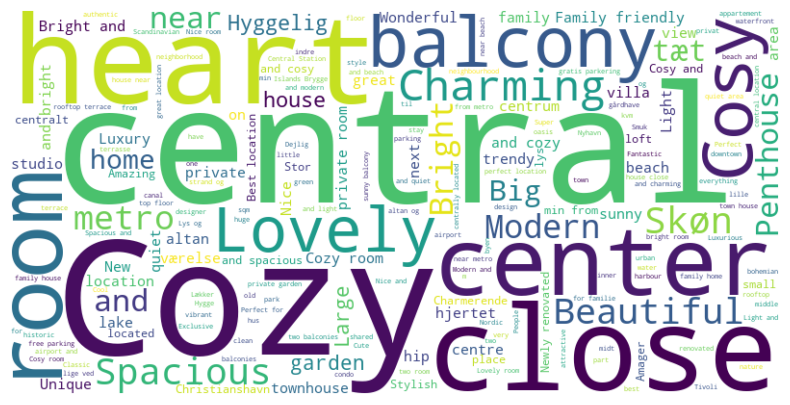

In [51]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
# Edited due to syntax error
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

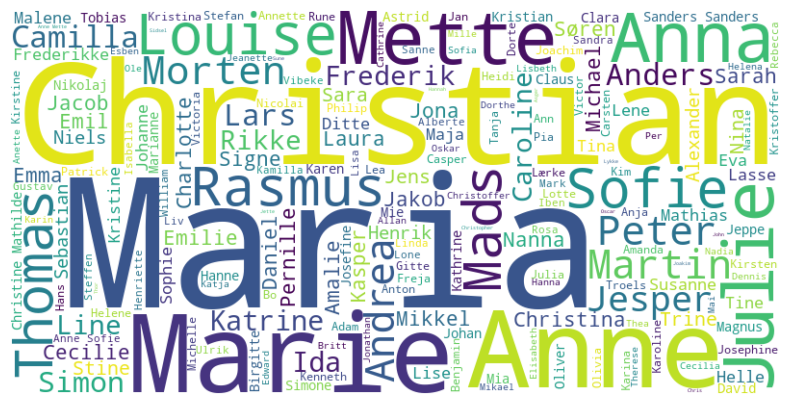

In [52]:
# State your solution here. Add more cells if needed.

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv('listings.csv')

#removes N/A 
data_filtered = data.dropna(subset=['host_name'])
#filters out invalid words
data_filtered = data_filtered[~data_filtered['host_name'].str.contains('Forenon|Blueground|Place|Denmark|ApartmentinCopenhagen|Og', na=False)]

text = ' '.join(data_filtered['host_name'])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()



### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

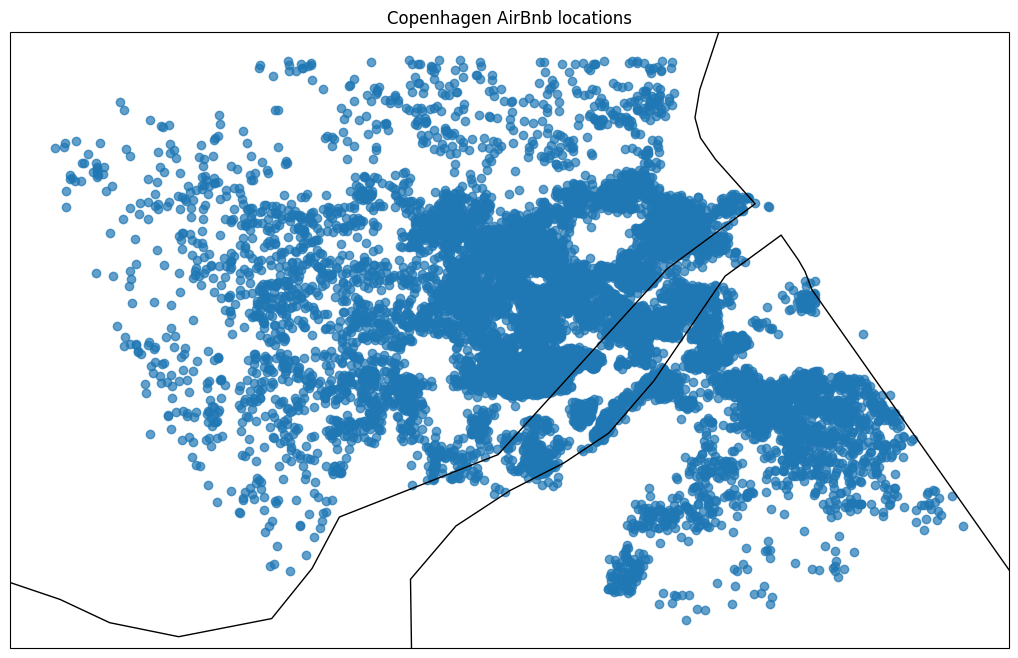

In [53]:
# State your solution here. Add more cells if needed.
import matplotlib.pyplot as plt
import cartopy.crs as crs

latitude = data_filtered['latitude']
longitude = data_filtered['longitude']

#initialize map projection
plt.figure(figsize=(16, 8))
ax = plt.axes(projection=crs.PlateCarree())

ax.coastlines()

#scatter plot
plt.title("Copenhagen AirBnb locations")
plt.scatter(longitude, latitude, alpha=0.7, transform=crs.PlateCarree())


plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [ ]:
# State your solution here. Add more cells if needed.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [ ]:
# State your solution here. Add more cells if needed.

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

Train set score 0.025326281254283378
Test set score 0.05016861733124811


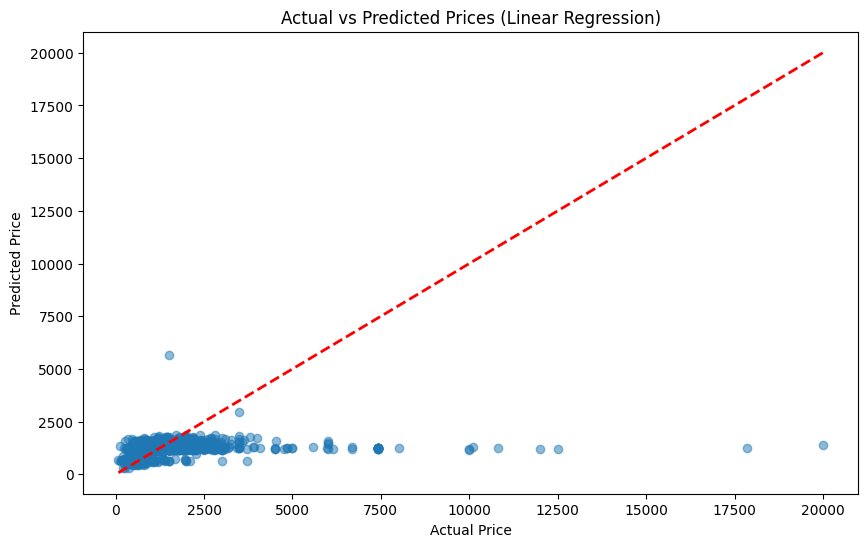

Intercept: -276913982306762.8


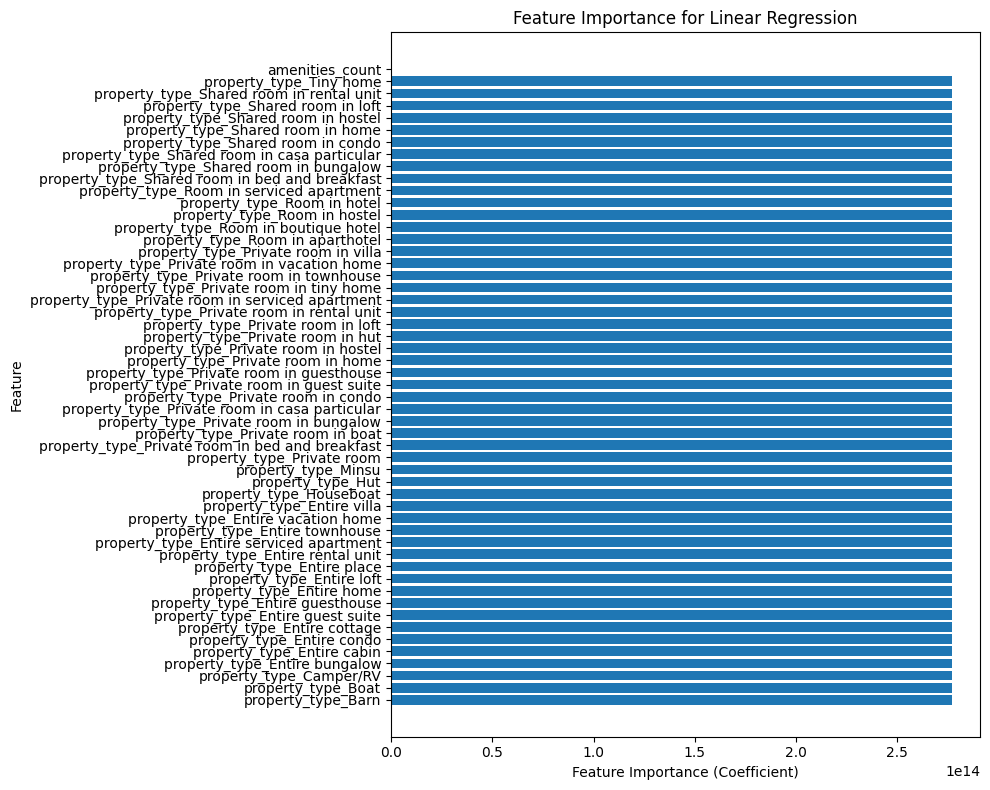

In [54]:
#PREPROCESSING of property type and amenities
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

rental_data = pd.read_csv('listings.csv')

#preprocess property type by encoding for each listing
type_encoded = pd.get_dummies(rental_data['property_type'], prefix='property_type', dtype='int')

#preprocess amenities by count for each listing
rental_data['amenities_count'] = rental_data['amenities'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

#remove $$$
rental_data['price'] = rental_data['price'].replace(r'[\$,]', '', regex=True).astype(float)
#combine preprocessed features
features = pd.concat([type_encoded, rental_data['amenities_count']], axis=1)

target=rental_data['price']

#split the data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=555)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)



predict_linear= linear_reg.predict(x_test)
print("Train set score", linear_reg.score(x_train, y_train))
print("Test set score", linear_reg.score(x_test, y_test))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')

plt.show()


print("Intercept:", linear_reg.intercept_)

# number of features and the corresponding feature names
n_features = len(linear_reg.coef_)
feature_names = features.columns 

plt.figure(figsize=(10, 8)) 

# Create a bar plot for the feature importances (coefficients)
plt.barh(range(n_features), linear_reg.coef_, align='center')
plt.yticks(np.arange(n_features), feature_names, rotation=0)  # Rotate labels to prevent overlap
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Feature")
plt.title("Feature Importance for Linear Regression")
plt.tight_layout()

# Display the plot
plt.show()


Model is underfitting and not able to capture meaningful patterns in the data, especially for higher prices. Scaling the features and considering more flexible models would likely improve its performance significantly.

### Scaling of linear model

Train set score 0.025302682598179915
Test set score 0.050241454879174086


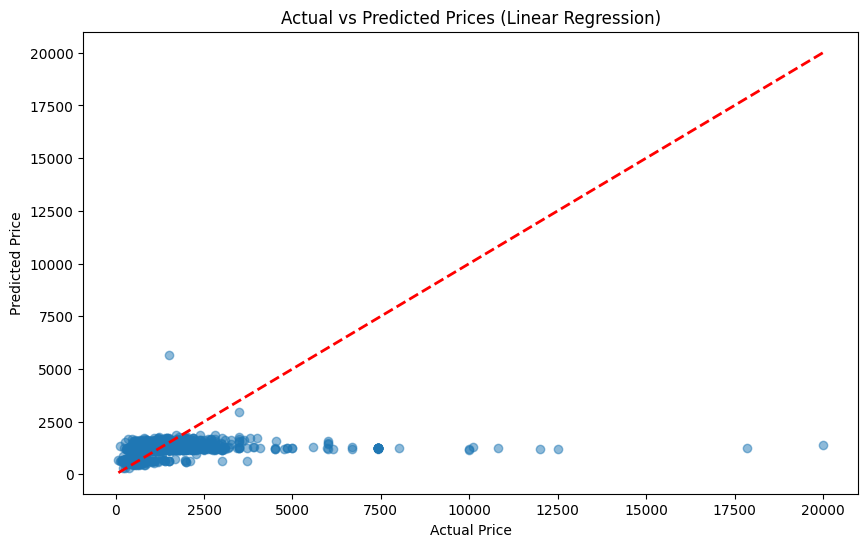

Intercept: 1207.4325459202478


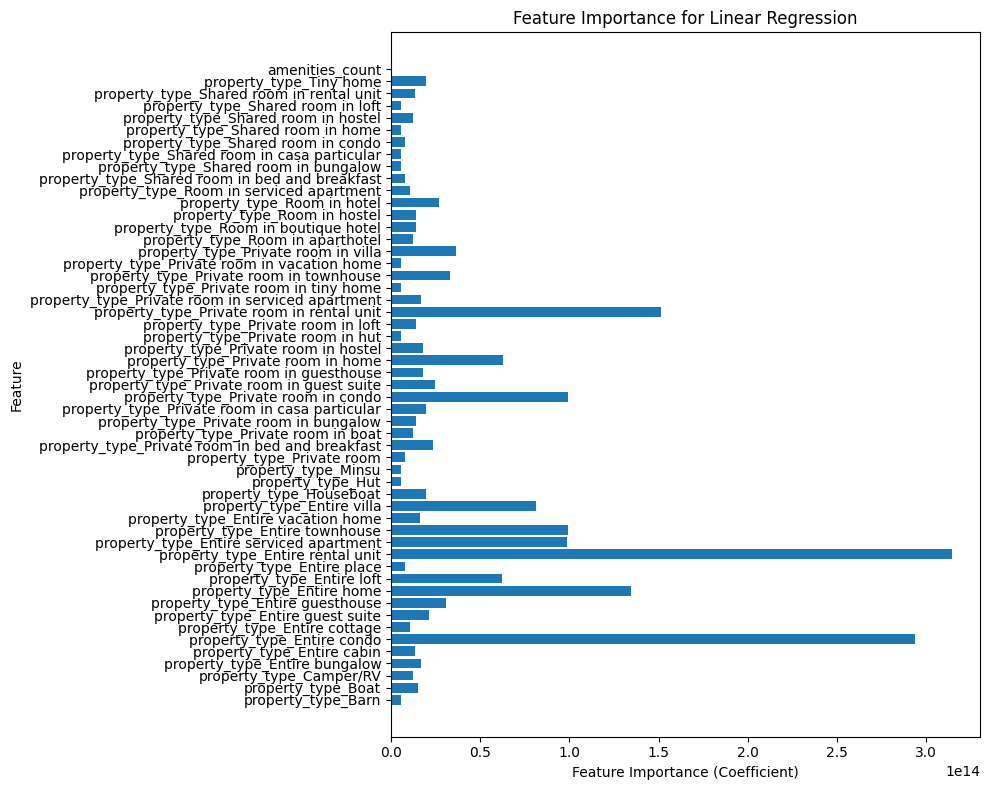

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, random_state=555)

linear_reg.fit(x_train, y_train)

predict_linear= linear_reg.predict(x_test)
print("Train set score", linear_reg.score(x_train, y_train))
print("Test set score", linear_reg.score(x_test, y_test))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')

plt.show()

print("Intercept:", linear_reg.intercept_)

# get number of features and corresponding feature names
n_features = len(linear_reg.coef_)
feature_names = features.columns  # columns of the feature datafram

plt.figure(figsize=(10, 8))  
plt.barh(range(n_features), linear_reg.coef_, align='center')
plt.yticks(np.arange(n_features), feature_names, rotation=0)
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Feature")
plt.title("Feature Importance for Linear Regression")
plt.tight_layout()

plt.show()

After scaling, linear regression model is performing a bit better, with slightly better train and test scores and a clearer understanding of feature importance, although it still struggles with higher prices. Overall dissatisfied as test score showed only 5% precision.

### Decision tree 

Decision Tree - Train set score 0.09785345958999203
Decision Tree - Test set score -0.2783876973992754


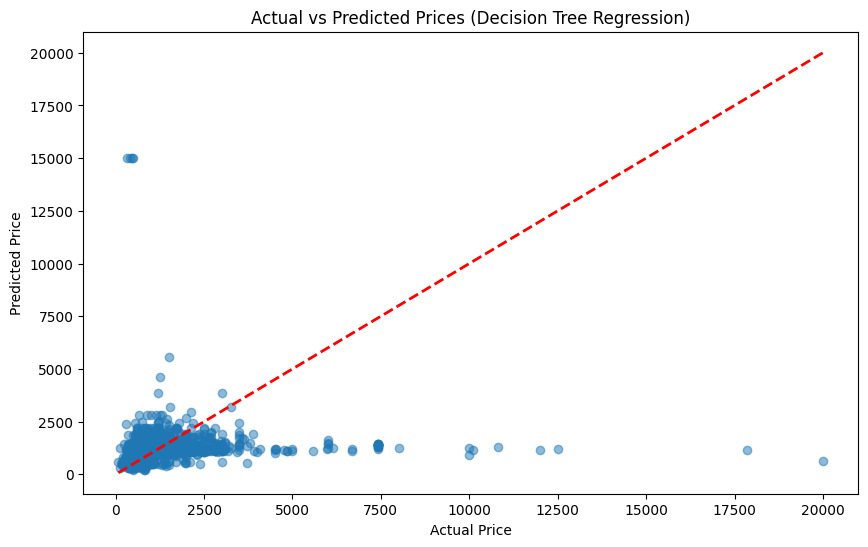

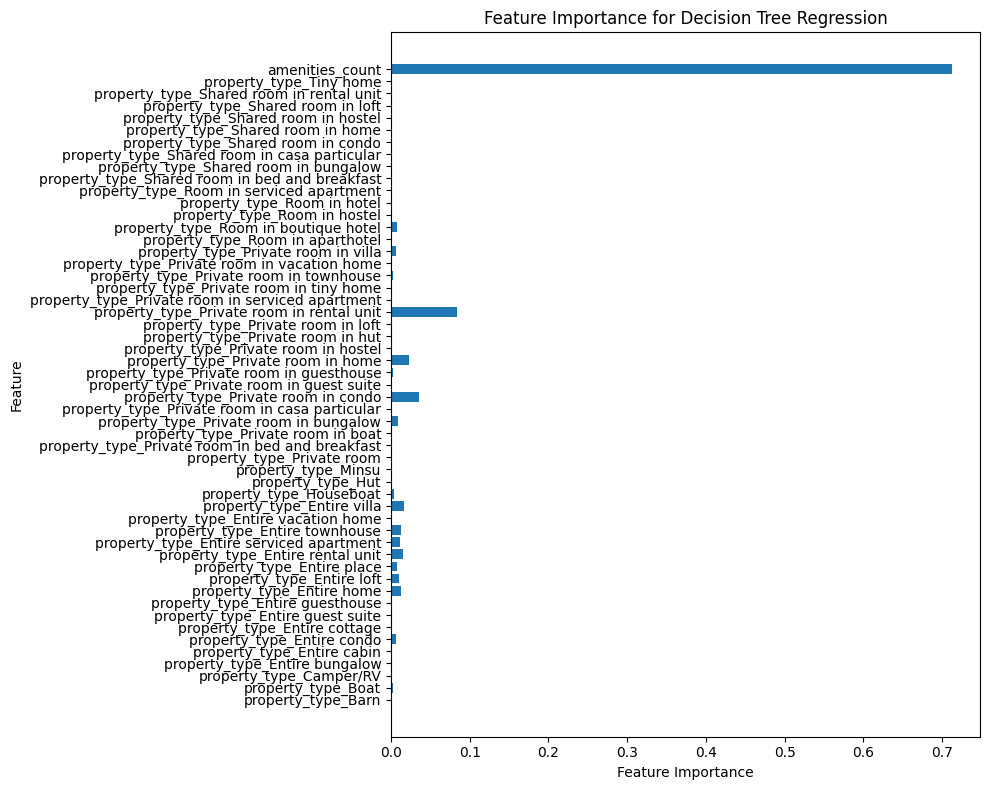

In [55]:
from sklearn.tree import DecisionTreeRegressor

# train a decision tree
decision_tree_reg = DecisionTreeRegressor(random_state=555)
decision_tree_reg.fit(x_train, y_train)

# make predictions on test set
predict_tree = decision_tree_reg.predict(x_test)

# display model performance scores
print("Decision Tree - Train set score", decision_tree_reg.score(x_train, y_train))
print("Decision Tree - Test set score", decision_tree_reg.score(x_test, y_test))

# plot actual and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Decision Tree Regression)')
plt.show()

# feature importance for decision tree
importances_tree = decision_tree_reg.feature_importances_

# create a bar plot for the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), importances_tree, align='center')
plt.yticks(np.arange(n_features), feature_names, rotation=0)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Decision Tree Regression")
plt.tight_layout()
plt.show()

ISSUES

Model Scores: The Decision Tree is underfitting with a poor train score (0.097) and an even worse test score (-0.273), indicating that it's not learning enough from the data.
Actual vs. Predicted Prices Plot: The model is decent at predicting lower prices but fails completely for higher prices, showing a significant gap between actual and predicted values
Feature Importance: The model relies almost entirely on the number of amenities and ignores most of the property_type features, which might be limiting its accuracy.

WHAT COULD HELP

The Decision Tree is too simple, and increasing its depth and tuning parameters could help it learn more complex patterns.
The model struggles with predicting high prices, so applying a transformation to the price or using Random Forest could improve its performance.

### - Random forest

Random Forest - Train set score 0.0942680321075463
Random Forest - Test set score -0.12313245851744647


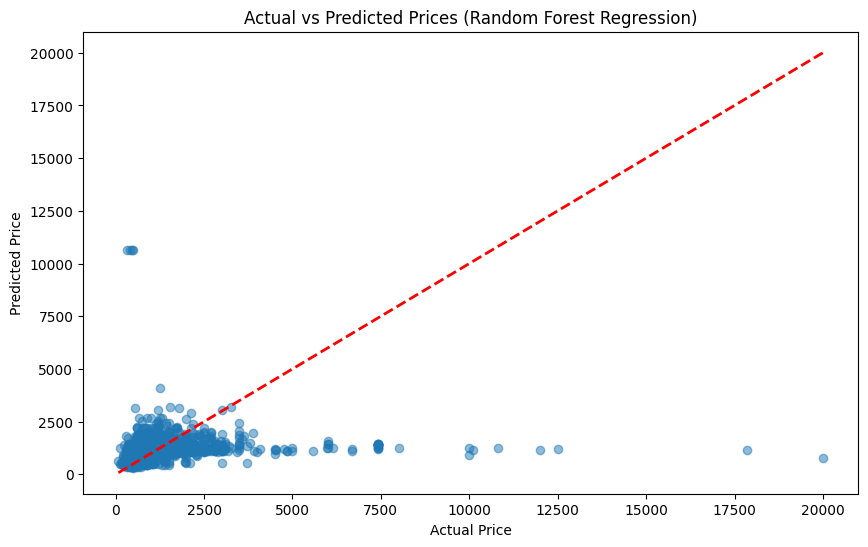

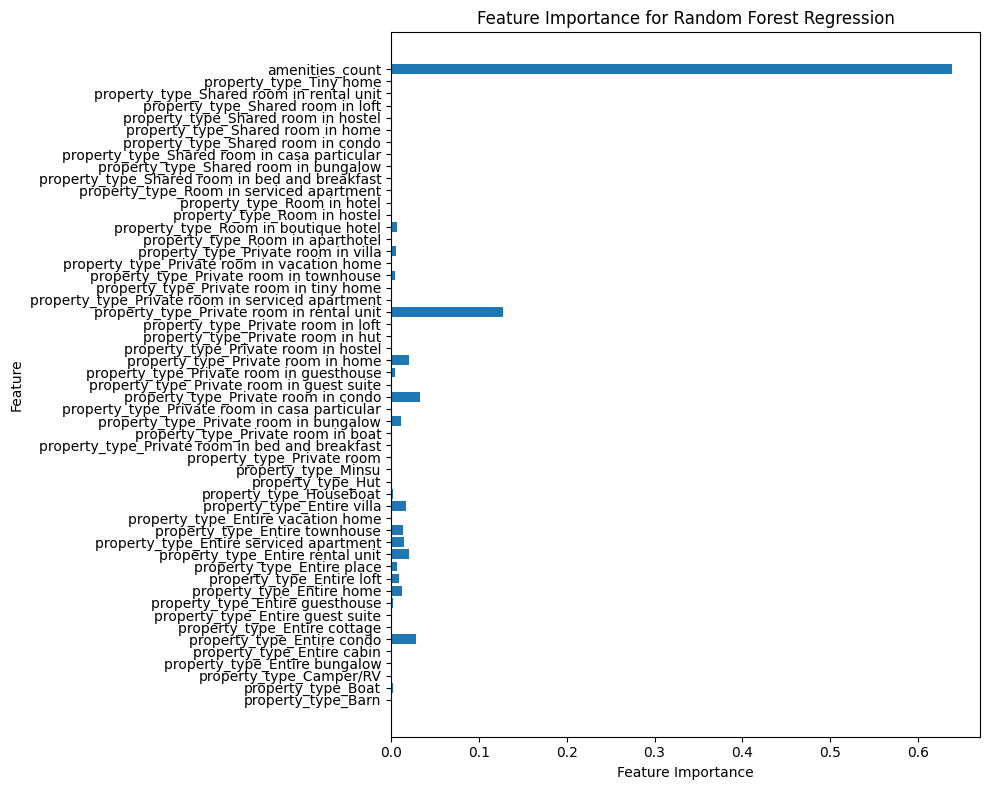

In [48]:
from sklearn.ensemble import RandomForestRegressor

# train a Random Forest model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=555)
random_forest_reg.fit(x_train, y_train)

# make predictions on the test set
predict_forest = random_forest_reg.predict(x_test)

# display model performance scores
print("Random Forest - Train set score", random_forest_reg.score(x_train, y_train))
print("Random Forest - Test set score", random_forest_reg.score(x_test, y_test))

# plot Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest Regression)')
plt.show()

# feature importance for Random Forest
importances_forest = random_forest_reg.feature_importances_

# create a bar plot for the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), importances_forest, align='center')
plt.yticks(np.arange(n_features), feature_names, rotation=0)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Regression")
plt.tight_layout()
plt.show()

Train score is just 0.097, which is very low. The model is learning slowly. Test score is even worse than zero, so model is doing worse than if we would just try guessing the number. Model is extremely UNDERFITTING.
Based on scatter plot, model seems to be good at predciting lower prices, but totally missess when price is high.
Feature importance tells us that model is mostly basing its predictions on number of amenities. Some property types have very low importance, meaning model doesn't think they matter in predicting the price, it could be missing important patterns.

To improve results, model would need more complexity and better feature selection to improve. 

# Conclusion

Linear regression (after scaling) is the best performer among the three models, with relatively high train and test scores. Scaling the features was critical for this model’s improvement.
Both decision tree and random forest severely underfit the data, largely ignoring important features and struggling to generalize to the test set. They might benefit from better feature choice or/and parameter tuning.